# Converting back and forth from Fe3Fet to different redox buffer positions.
- You can download the spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Other_features/Redox_Conversions.xlsx

In [1]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Load in data
- No suffix in file, so add here to say they are liquids

In [2]:
load=pt.import_excel('Redox_Conversions.xlsx', sheet_name="Liqs", suffix='_Liq')
Liqs=load['Liqs']
Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.508277,0.0,0.0,0.0,0.0,0
1,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.0,0.253478,0.518386,0.0,0.0,0.0,0.0,1
2,51.491657,2.771451,13.666925,11.521905,0.200504,6.275374,10.459901,2.509225,0.520502,0.0,0.268098,0.548285,0.0,0.0,0.0,0.0,2
3,51.508276,2.872896,13.569897,11.795709,0.208908,6.138356,10.217900,2.543802,0.541088,0.0,0.279336,0.571268,0.0,0.0,0.0,0.0,3
4,51.506960,3.058952,13.350351,12.214913,0.223782,5.856971,9.977521,2.592645,0.577148,0.0,0.299224,0.611940,0.0,0.0,0.0,0.0,4


## Example 1: Calculating Fe3Fet for a series of liquid compositions
- Remember, Fe3Fet_Liq to buffer positions is very dependent on temperature, so first we need to choose a thermometer

In [3]:
# Calculate temperature
T_HT87=pt.calculate_liq_only_temp(liq_comps=Liqs, equationT='T_Helz1987_MgO')

### 1a: Using a value for logfo2

In [4]:
logfo2=-7.58429552677443

# Calculate oxides using Kress 1991 and 3 kbar, and 
myLiquids_Fe3_Kress_norm=pt.convert_fo2_to_fe_partition(liq_comps=Liqs, T_K=T_HT87, 
                            P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,ln_XFe2FeO3_XFeO
0,51.573474,2.607633,13.559981,2.813568,8.606944,0.186298,6.713780,10.999680,2.412425,0.484906,0.249103,0.227286,-1.916290
1,51.582033,2.647602,13.749479,2.869927,8.617879,0.190011,6.513072,10.839765,2.456826,0.494572,0.254069,0.230563,-1.897726
2,51.620474,2.778399,13.701184,2.993012,8.856176,0.201006,6.291105,10.486121,2.515515,0.521807,0.268770,0.233184,-1.883008
3,51.644329,2.880498,13.605809,3.084121,9.050289,0.209461,6.154600,10.244940,2.550534,0.542520,0.280075,0.234673,-1.874703
4,51.654905,3.067754,13.388765,3.261699,9.313550,0.224426,5.873824,10.006230,2.600105,0.578808,0.300085,0.239613,-1.847396


Text(0, 0.5, 'Fe3Fet Liq')

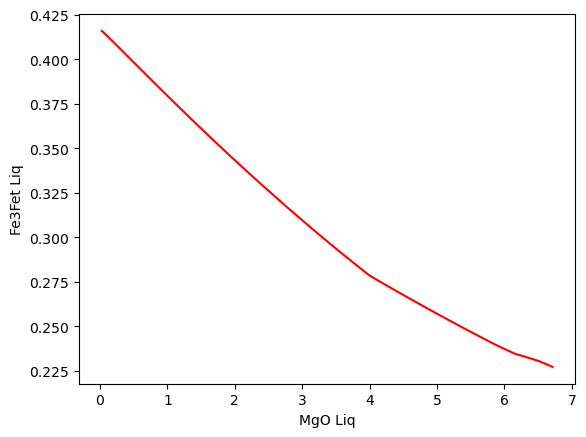

In [5]:
plt.plot(myLiquids_Fe3_Kress_norm['MgO_Liq'], myLiquids_Fe3_Kress_norm['Fe3Fet_Liq'], '-r')
plt.xlabel('MgO Liq')
plt.ylabel('Fe3Fet Liq')

### 1b: At a known buffer (here, QFM)

In [6]:
# Calculate oxides using Kress 1991 and 3 kbar, and 
myLiquids_Fe3_Kress_norm_QFM=pt.convert_fo2_to_fe_partition(liq_comps=Liqs, T_K=1200+273.15, 
                            P_kbar=1.734, fo2="QFM", fo2_offset=0, model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm_QFM.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,ln_XFe2FeO3_XFeO
0,51.622224,2.610098,13.572799,1.866153,9.470432,0.186474,6.720126,11.010078,2.414705,0.485364,0.249339,0.150603,-2.422469
1,51.633633,2.650250,13.763233,1.867267,9.531780,0.190201,6.519587,10.850608,2.459283,0.495067,0.254323,0.149855,-2.428329
2,51.676499,2.781414,13.716054,1.905119,9.848144,0.201224,6.297933,10.497502,2.518245,0.522373,0.269062,0.148259,-2.440912
3,51.703454,2.883796,13.621385,1.936526,10.097010,0.209701,6.161646,10.256669,2.553453,0.543141,0.280396,0.147176,-2.449517
4,51.720280,3.071636,13.405710,1.992969,10.471292,0.224710,5.881258,10.018894,2.603396,0.579541,0.300465,0.146216,-2.457186


Text(0, 0.5, 'Fe3Fet Liq')

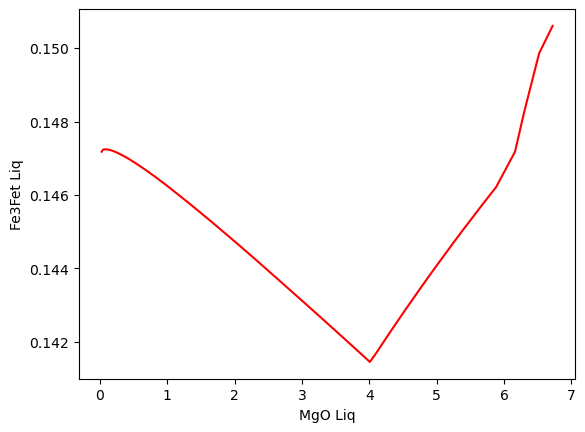

In [7]:
plt.plot(myLiquids_Fe3_Kress_norm_QFM['MgO_Liq'], myLiquids_Fe3_Kress_norm_QFM['Fe3Fet_Liq'], '-r')
plt.xlabel('MgO Liq')
plt.ylabel('Fe3Fet Liq')

### 1c: At buffer with offset (here NNO+1)

In [8]:
# Calculate oxides using Kress 1991 and 3 kbar, and 
myLiquids_Fe3_Kress_norm_NNO1=pt.convert_fo2_to_fe_partition(liq_comps=Liqs, T_K=T_HT87, 
                            P_kbar=3, fo2="NNO", fo2_offset=1, model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm_NNO1.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,ln_XFe2FeO3_XFeO
0,51.546390,2.606264,13.552860,3.339932,8.127207,0.186200,6.710254,10.993904,2.411158,0.484651,0.248972,0.269955,-1.687440
1,51.557365,2.646336,13.742904,3.349248,8.180990,0.189920,6.509957,10.834581,2.455651,0.494335,0.253947,0.269205,-1.691251
2,51.598076,2.777193,13.695239,3.427946,8.459594,0.200919,6.288375,10.481571,2.514423,0.521581,0.268654,0.267191,-1.701514
3,51.623335,2.879327,13.600278,3.491627,8.678603,0.209376,6.152098,10.240776,2.549497,0.542300,0.279962,0.265793,-1.708666
4,51.637241,3.066705,13.384186,3.604510,9.000728,0.224349,5.871815,10.002808,2.599216,0.578610,0.299982,0.264891,-1.713293


Text(0, 0.5, 'Fe3Fet Liq')

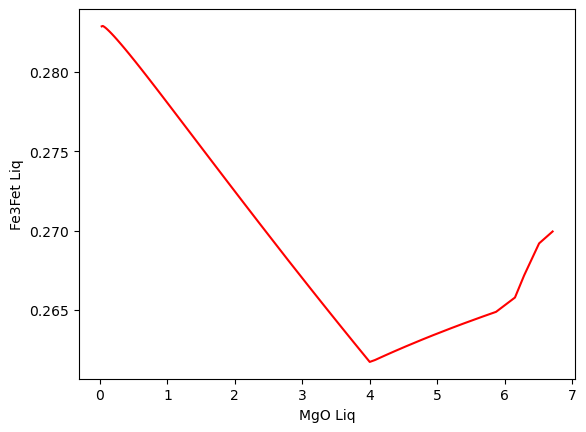

In [9]:
plt.plot(myLiquids_Fe3_Kress_norm_NNO1['MgO_Liq'], myLiquids_Fe3_Kress_norm_NNO1['Fe3Fet_Liq'], '-r')
plt.xlabel('MgO Liq')
plt.ylabel('Fe3Fet Liq')

### 1d: With different normalization routines:
- So far, we used Norm=True, this renormalizes the other oxides to account for the changing FeO and Fe2O3 amount, can also put false, doesn't affect the Fe3FeT but affects the oxide concs.  You can see this by comparing the other oxide contents

In [10]:
logfo2=-7.58429552677443
print('Original')
display(Liqs.loc[[0]])

# No renormalizatoin
myLiquids_Fe3_Kress_nonorm=pt.convert_fo2_to_fe_partition(liq_comps=Liqs.loc[[0]], T_K=T_HT87.loc[[0]], 
                            P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=False)
print('No Norm')
display(myLiquids_Fe3_Kress_nonorm)


# With renormalization 
myLiquids_Fe3_Kress_norm=pt.convert_fo2_to_fe_partition(liq_comps=Liqs.loc[[0]], T_K=T_HT87.loc[[0]], 
                            P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=True)
print('Renorm')
display(myLiquids_Fe3_Kress_norm)


Original


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.456179,2.60169,13.529073,11.11461,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.508277,0.0,0.0,0.0,0.0,0


No Norm


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,...,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2,ln_XFe2FeO3_XFeO
0,51.456179,2.60169,13.529073,11.11461,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,...,0.508277,0.227286,0.0,0.0,0.0,0,8.589075,2.807726,0.147152,-1.91629


Renorm


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,ln_XFe2FeO3_XFeO
0,51.573474,2.607633,13.559981,2.813568,8.606944,0.186298,6.71378,10.99968,2.412425,0.484906,0.249103,0.227286,-1.91629


## Converting from FeO and Fe2O3 proportions to fo2
- This function goes the other way, it takes a liquid with FeO and Fe2O3, and a temperature and pressure, and converts to a buffer position/delta fo2 vlaue

In [11]:
## The inversion isn't quite perfect, but is very close
calc_fo2=pt.convert_fe_partition_to_fo2(liq_comps=myLiquids_Fe3_Kress_norm_NNO1,
                                        T_K=T_HT87, P_kbar=3, model="Kress1991", renorm=False)

using inputted FeO and Fe2O3 contents
(49,)


In [12]:
calc_fo2

,DeltaQFM_Frost1991,DeltaNNO_Frost1991,fo2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,ln_XFe2FeO3_XFeO,FeOt_Liq
0,1.587252,0.980283,7.999607e-08,51.546390,2.606264,13.552860,3.339932,8.127207,0.186200,6.710254,10.993904,2.411158,0.484651,0.248972,0.269955,-1.687440,11.132479
1,1.587349,0.980431,7.139051e-08,51.557365,2.646336,13.742904,3.349248,8.180990,0.189920,6.509957,10.834581,2.455651,0.494335,0.253947,0.269205,-1.691251,11.194643
2,1.587300,0.980439,6.284887e-08,51.598076,2.777193,13.695239,3.427946,8.459594,0.200919,6.288375,10.481571,2.514423,0.521581,0.268654,0.267191,-1.701514,11.544059
3,1.587231,0.980406,5.807824e-08,51.623335,2.879327,13.600278,3.491627,8.678603,0.209376,6.152098,10.240776,2.549497,0.542300,0.279962,0.265793,-1.708666,11.820369
4,1.586615,0.979863,4.928451e-08,51.637241,3.066705,13.384186,3.604510,9.000728,0.224349,5.871815,10.002808,2.599216,0.578610,0.299982,0.264891,-1.713293,12.244066
5,1.586086,0.979386,4.382653e-08,51.638351,3.199578,13.221434,3.682642,9.209909,0.234892,5.673066,9.879096,2.629078,0.603989,0.314080,0.264593,-1.714823,12.523550
6,1.585330,0.978706,3.698529e-08,51.634502,3.398218,12.978289,3.796698,9.516734,0.250723,5.387579,9.701648,2.668614,0.641860,0.335248,0.264151,-1.717094,12.933002
7,1.584851,0.978275,3.316046e-08,51.628396,3.530278,12.816809,3.870774,9.716984,0.261292,5.205129,9.588480,2.691642,0.666987,0.349380,0.263860,-1.718595,13.199906
8,1.584167,0.977661,2.831006e-08,51.614145,3.727939,12.575476,3.979141,10.011395,0.277175,4.942417,9.425986,2.721464,0.704516,0.370618,0.263425,-1.720831,13.591826
9,1.583734,0.977274,2.556757e-08,51.601373,3.859495,12.415173,4.049654,10.203931,0.287788,4.774137,9.322264,2.738345,0.729436,0.384809,0.263138,-1.722315,13.847810
